## Many with weight dynamics

Let's take the real coupling from before and add the baseline weight dynamics of the previous notebooks:

$$
\begin{eqnarray*}
    \dot{z_i} & = & z_i \left((\lambda + \mathrm{i}) + b |z_i|^2 \right) + \sum_k W_{ik} \mathrm{Re}(z_k) \\
    \dot{W} & = & \alpha \left( I_{N_z} - \mathrm{Re}(\mathbf{z})\mathrm{Re}(\mathbf{z})^\top \right)
\end{eqnarray*}
$$

In [1]:
import numpy as np

import scipy.integrate
import scipy.signal

import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

In [2]:
n_sim = 25

Nz = 20
alpha = 0.1

t_span = [0, 1e3]
t_eval = np.arange( t_span[0], t_span[-1], 1e-2 )

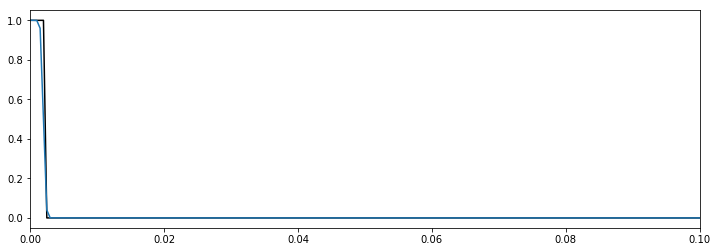

In [3]:
# Design our filters
passband_ripple = 0.005
passband_ripple_db = -20 * np.log10( passband_ripple )
stopband_attenuation = 65
stopband_attenuation_db = stopband_attenuation
kaiser_design_param = np.maximum( passband_ripple_db, stopband_attenuation_db )

width_low = 0.0015
numtaps_low, beta_low = scipy.signal.kaiserord( kaiser_design_param, width_low / 0.5 )

cutoff_low = 0.002
taps_low = scipy.signal.firwin( numtaps_low, np.array( [cutoff_low] ),
                                window = ('kaiser', beta_low),
                                scale = False,
                                pass_zero = True,
                                nyq = 0.5 )

n_taps_low = taps_low.shape[0]

# Show the filters
if True:
    w_low, h_low = scipy.signal.freqz( taps_low, worN = 1000 )

    w_low *= (0.5 / np.pi)

    plt.figure( figsize = (12, 4) )
    plt.plot( w_low, (w_low <= cutoff_low), 'k-' )
    plt.plot( w_low, np.abs( h_low ) )
    plt.xlim( 0, 0.1 )

In [4]:
params_l = []
params_b = []
result_d = []
result_d_prime = []
traces_all = []

In [5]:
import warnings
warnings.simplefilter( action = 'ignore', category = FutureWarning )

Simulation 0
    Solving... Done.


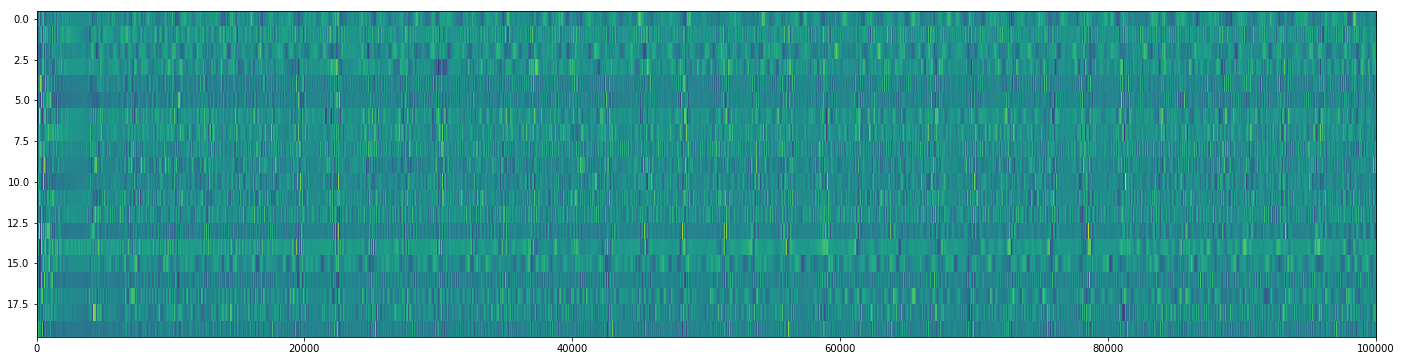

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 1
    Solving... Done.


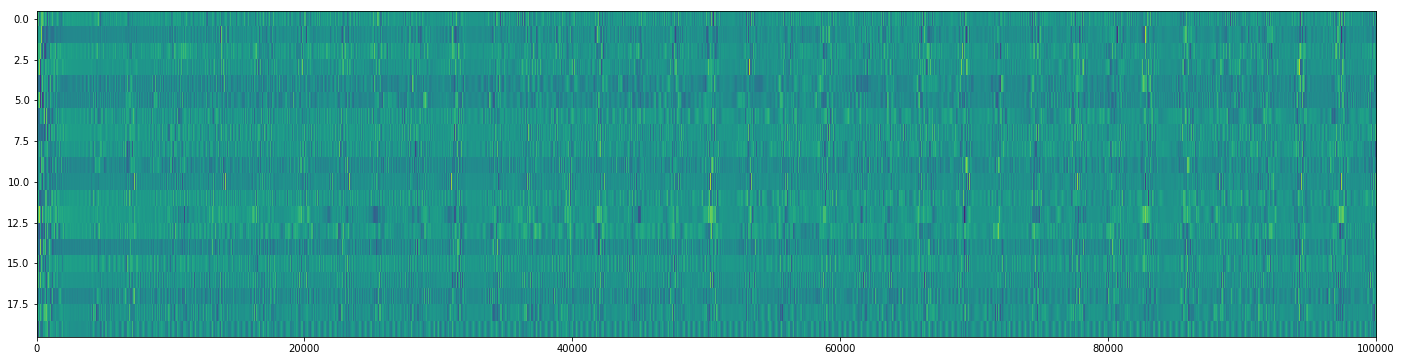

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 2
    Solving... Done.


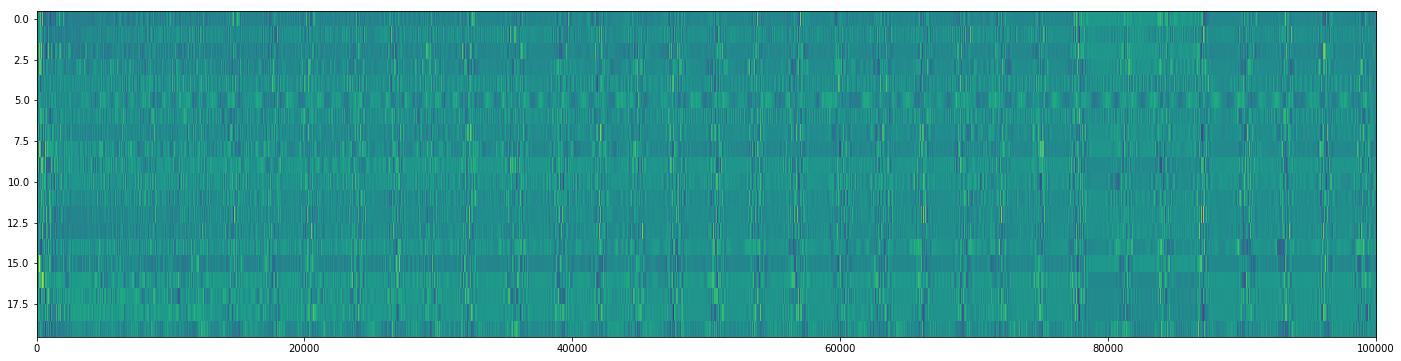

    Computing distribution stats... 

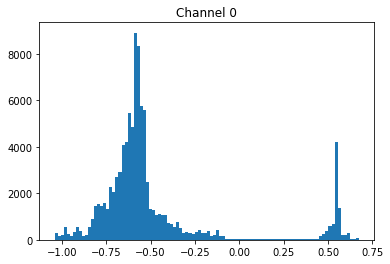

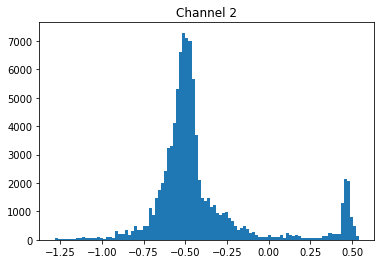

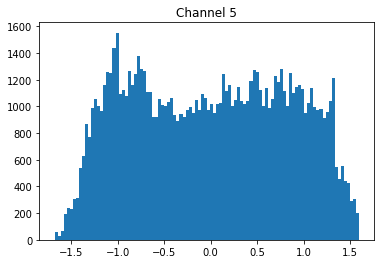

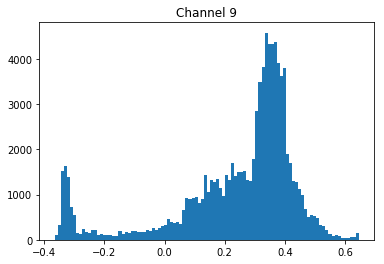

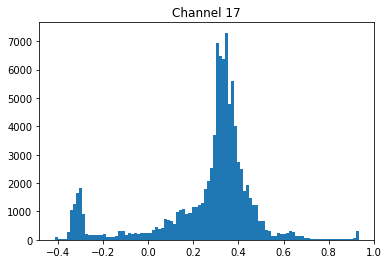

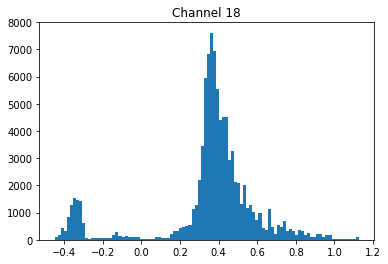

Done.
    Bimodal channels: (array([ 0,  2,  5,  9, 17, 18]),)
Simulation 3
    Solving... Done.


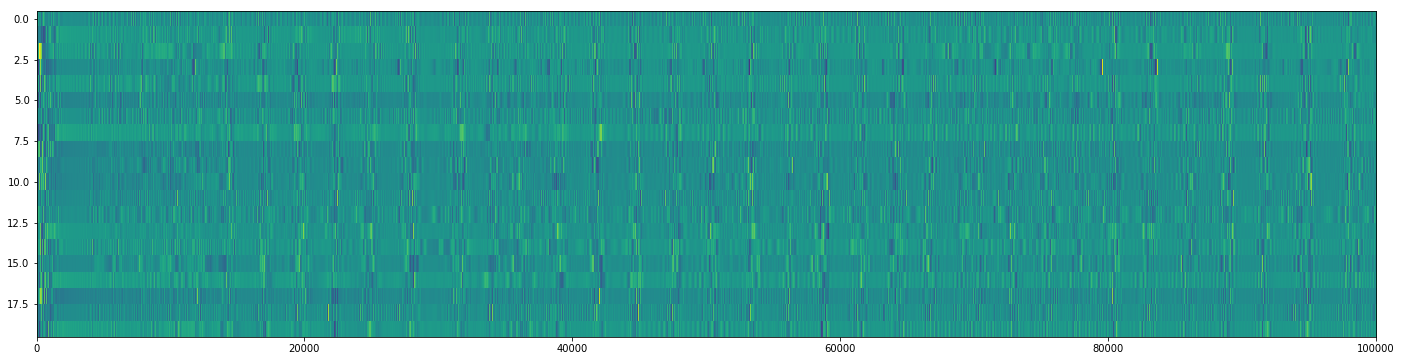

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 4
    Solving... Done.


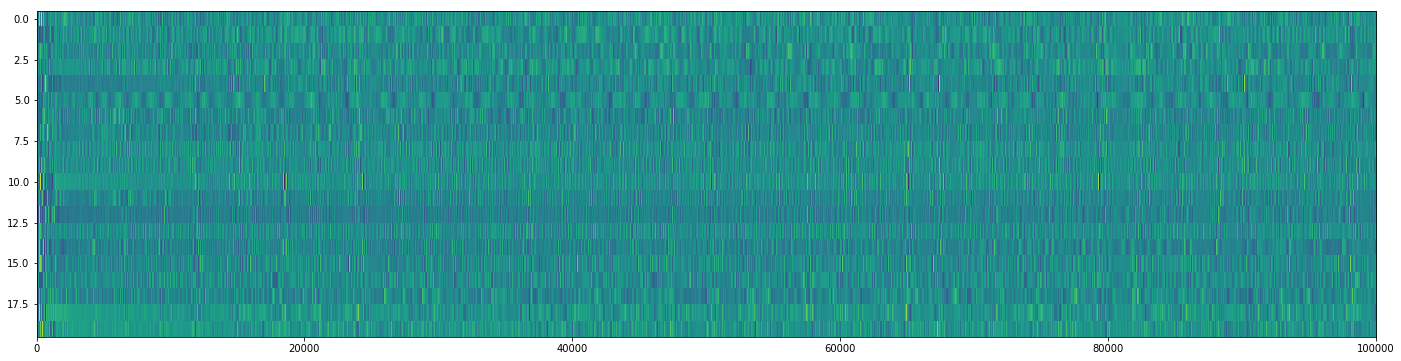

    Computing distribution stats... 

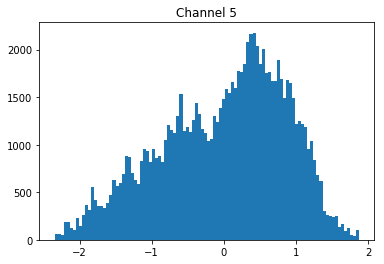

Done.
    Bimodal channels: (array([5]),)
Simulation 5
    Solving... Done.


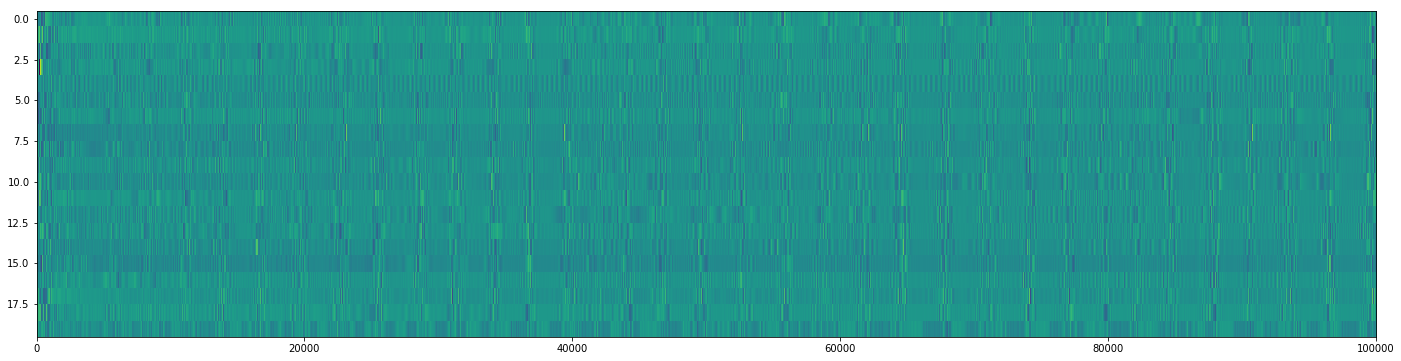

    Computing distribution stats... 

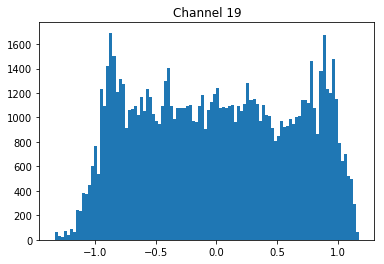

Done.
    Bimodal channels: (array([19]),)
Simulation 6
    Solving... Done.


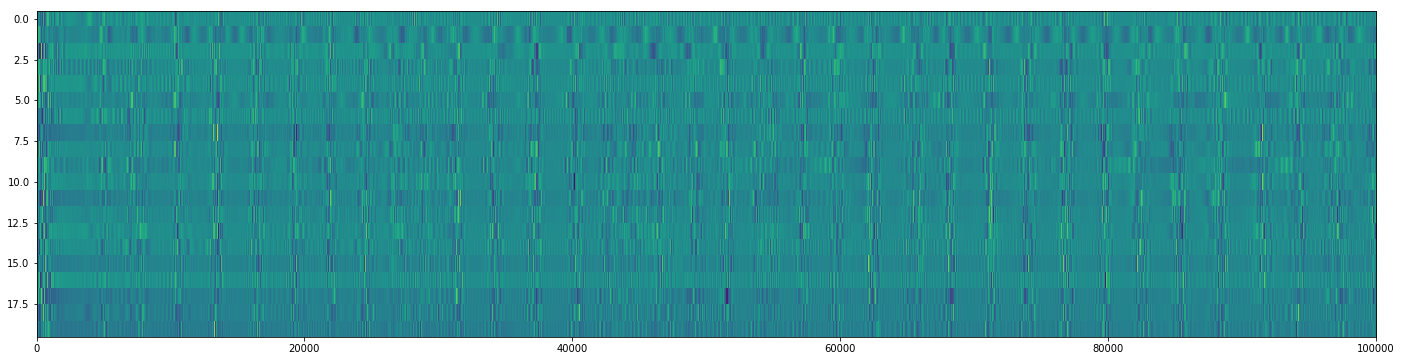

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 7
    Solving... Done.


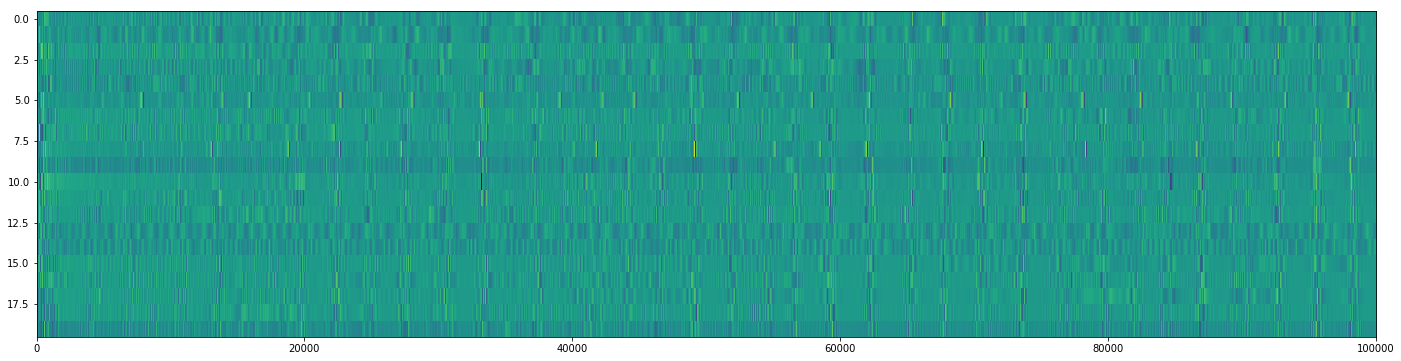

    Computing distribution stats... 

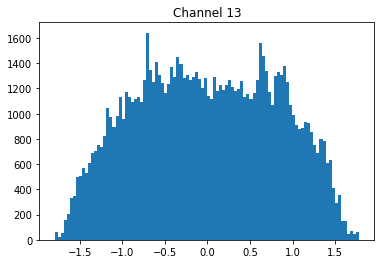

Done.
    Bimodal channels: (array([13]),)
Simulation 8
    Solving... Done.


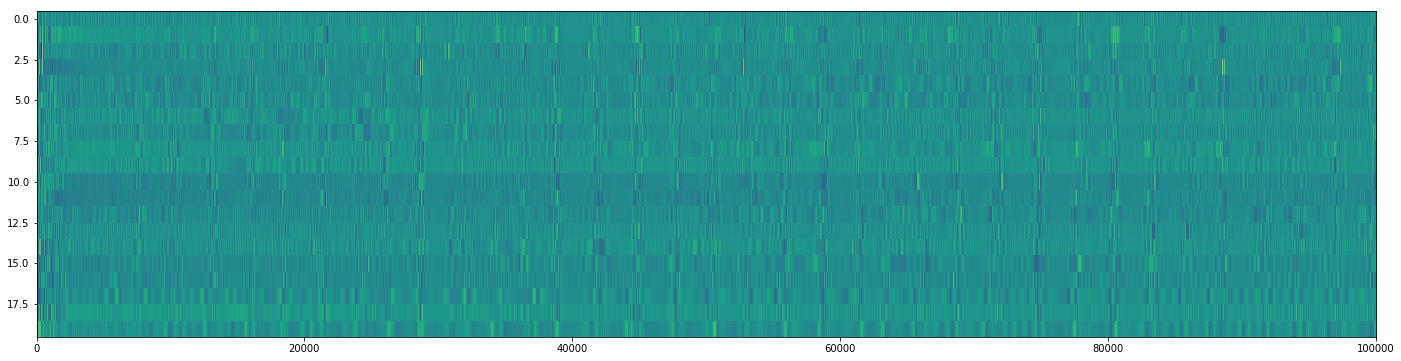

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 9
    Solving... Done.


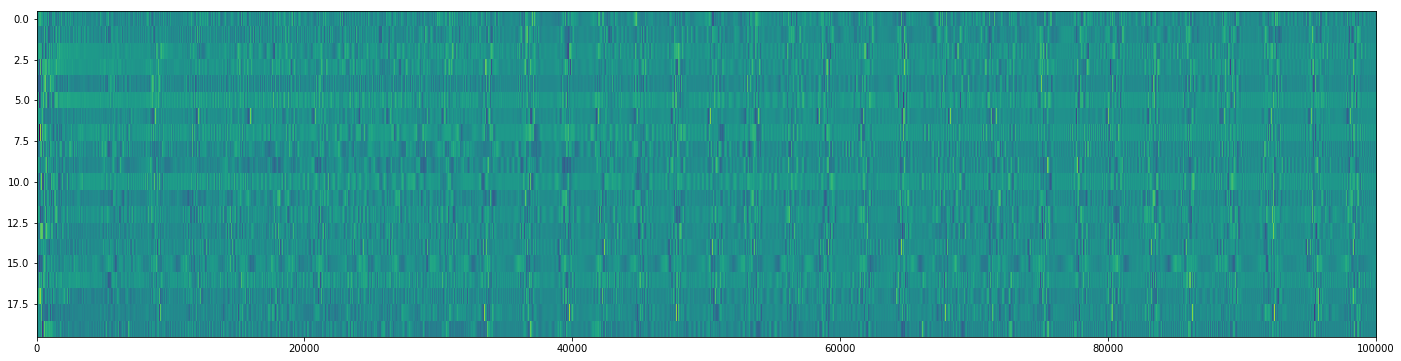

    Computing distribution stats... 

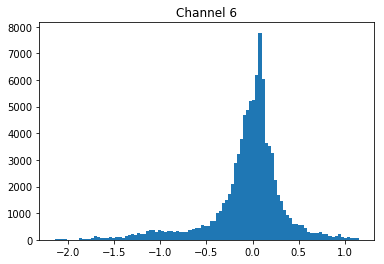

Done.
    Bimodal channels: (array([6]),)
Simulation 10
    Solving... Done.


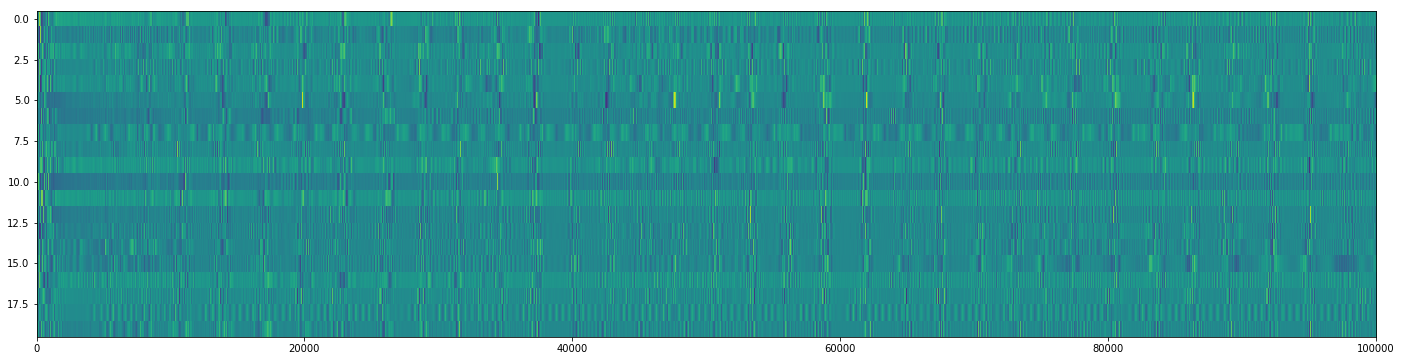

    Computing distribution stats... 

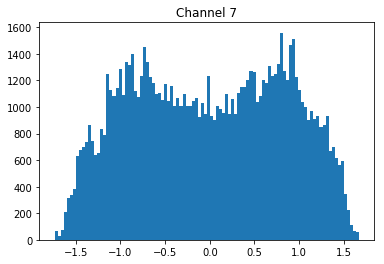

Done.
    Bimodal channels: (array([7]),)
Simulation 11
    Solving... Done.


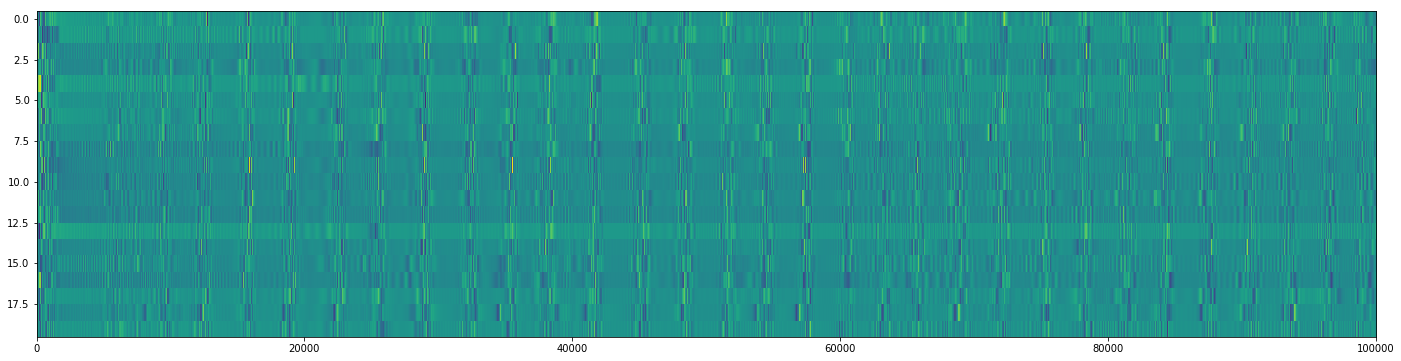

    Computing distribution stats... 

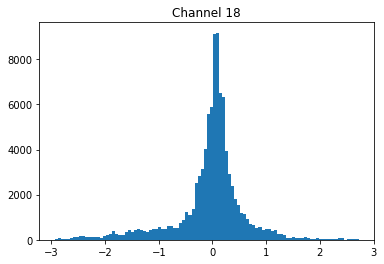

Done.
    Bimodal channels: (array([18]),)
Simulation 12
    Solving... Done.


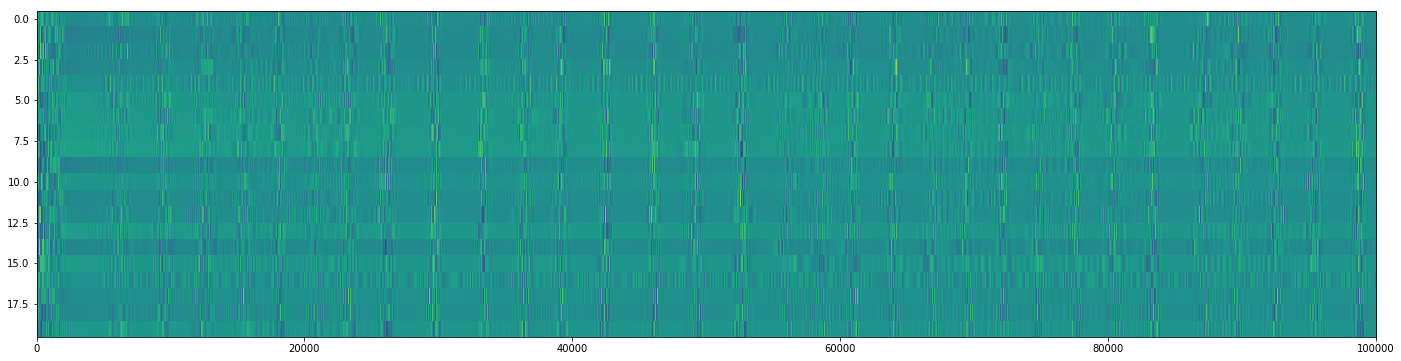

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 13
    Solving... Done.


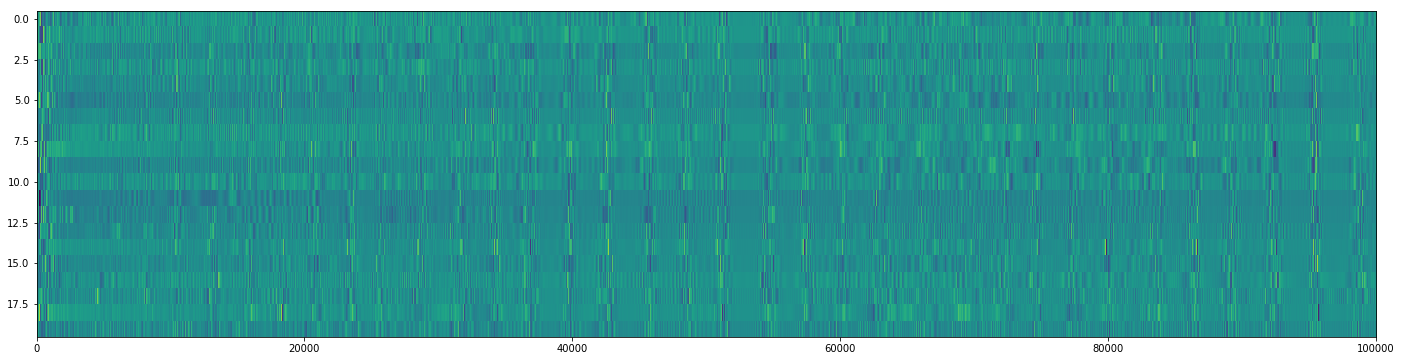

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 14
    Solving... Done.


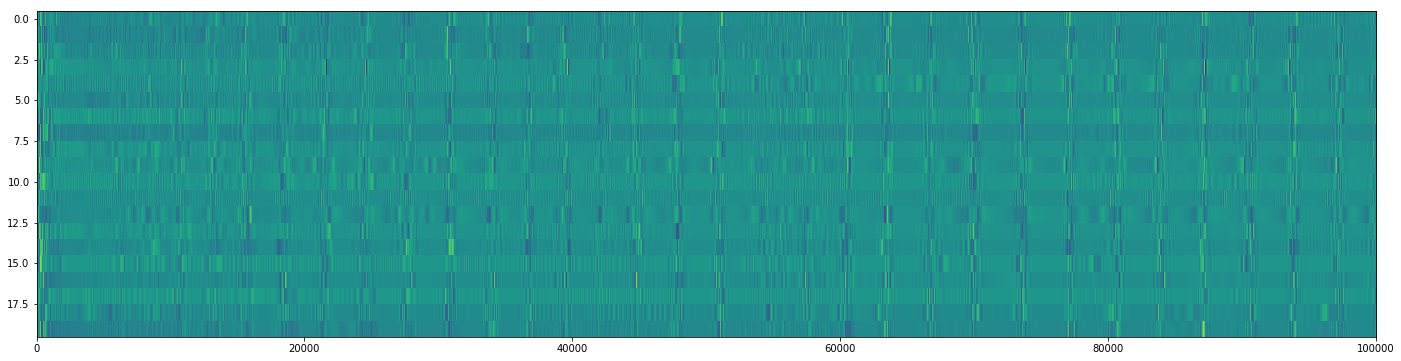

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 15
    Solving... Done.


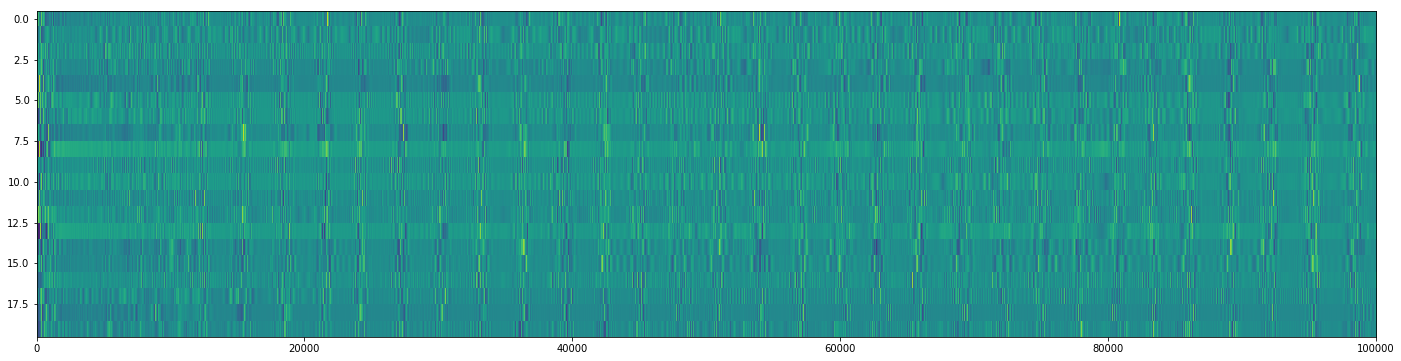

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 16
    Solving... Done.


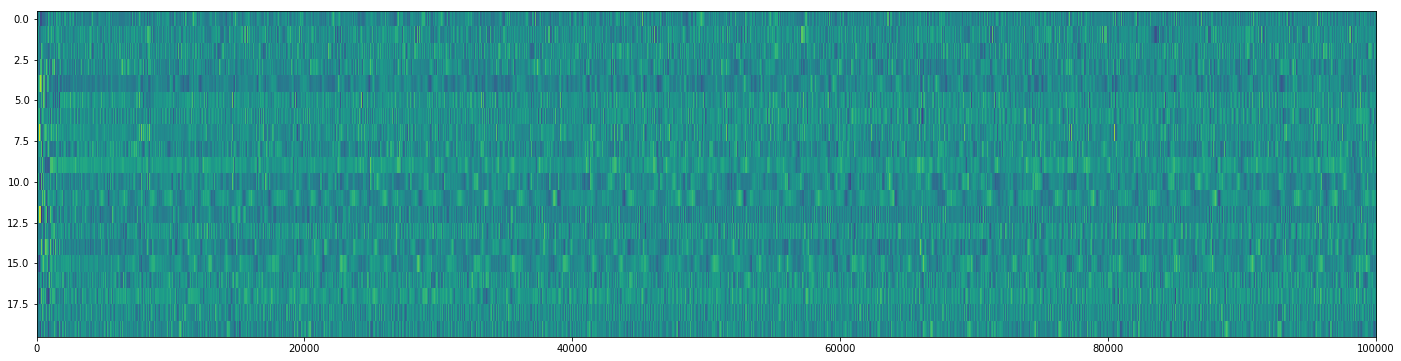

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 17
    Solving... Done.


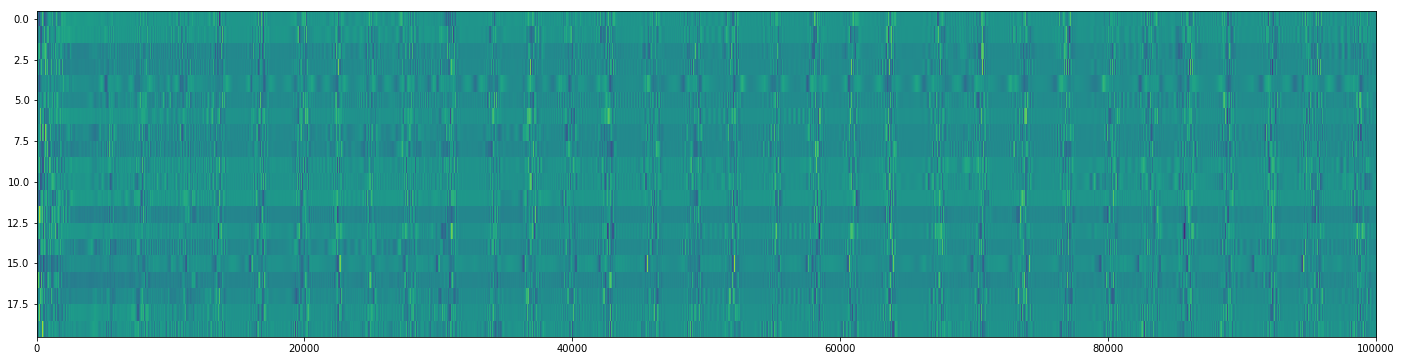

    Computing distribution stats... 

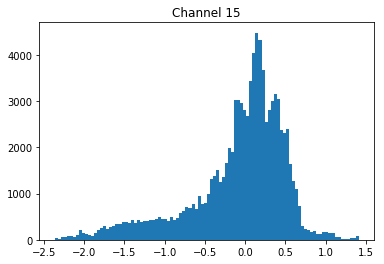

Done.
    Bimodal channels: (array([15]),)
Simulation 18
    Solving... Done.


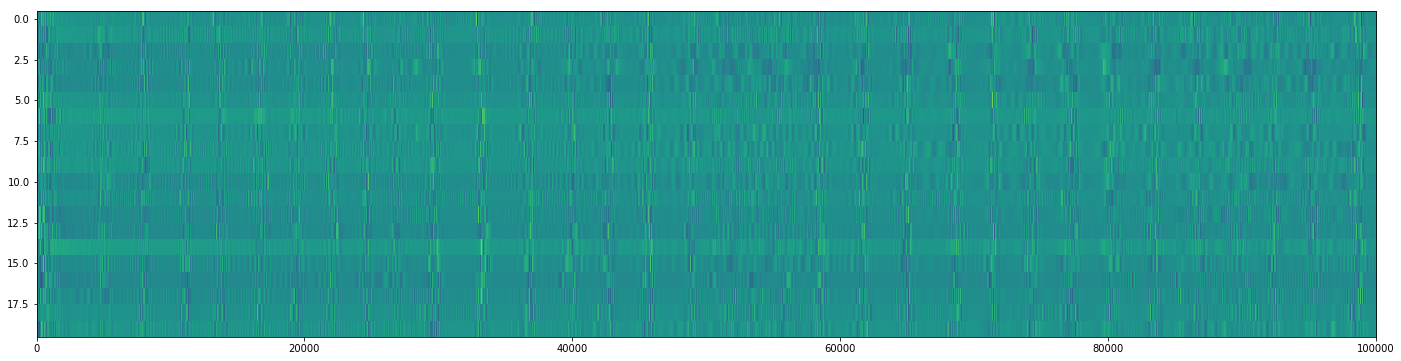

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 19
    Solving... Done.


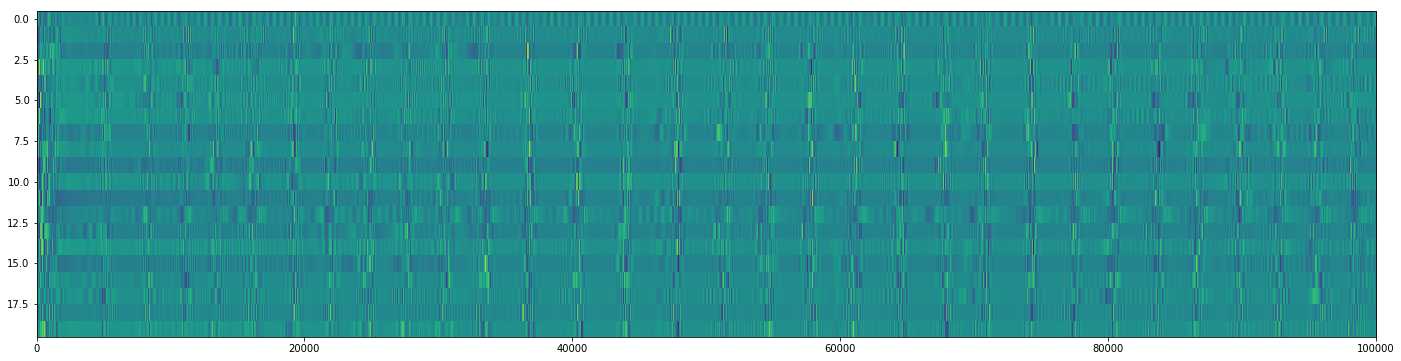

    Computing distribution stats... 

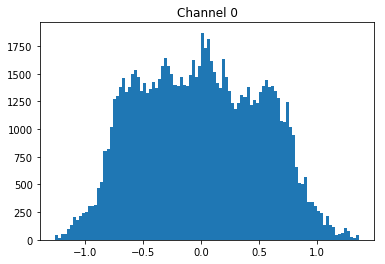

Done.
    Bimodal channels: (array([0]),)
Simulation 20
    Solving... Done.


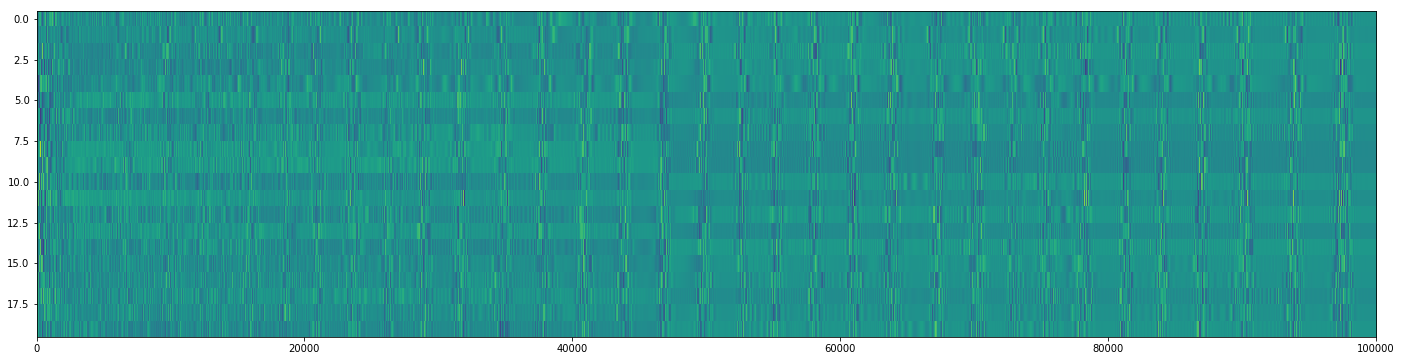

    Computing distribution stats... 

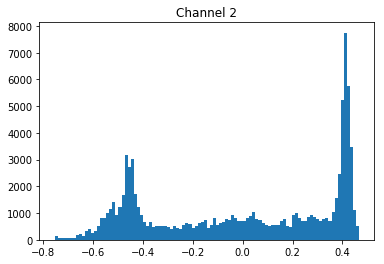

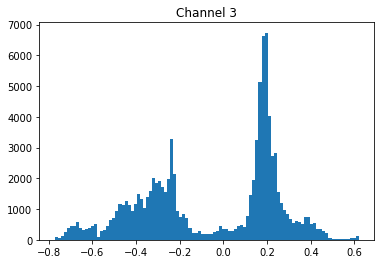

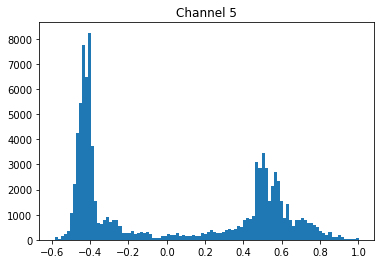

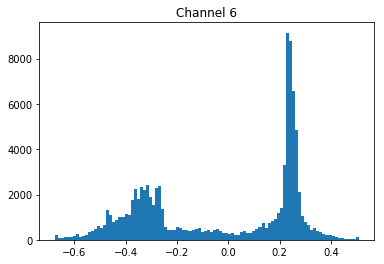

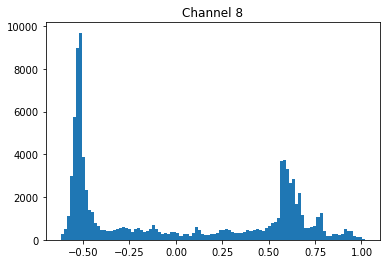

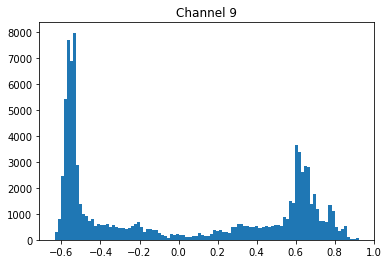

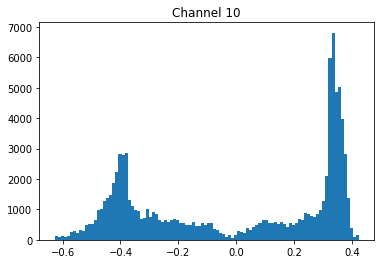

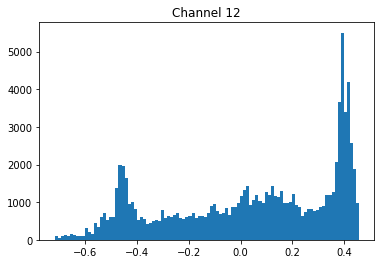

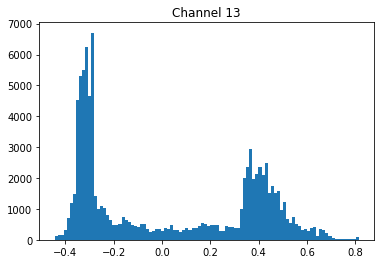

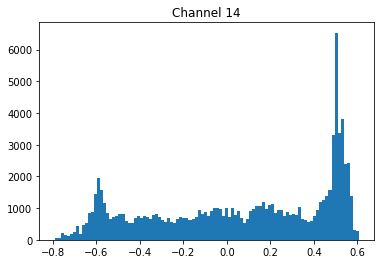

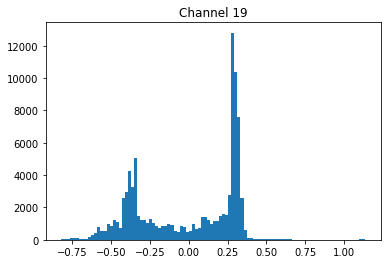

Done.
    Bimodal channels: (array([ 2,  3,  5,  6,  8,  9, 10, 12, 13, 14, 19]),)
Simulation 21
    Solving... Done.


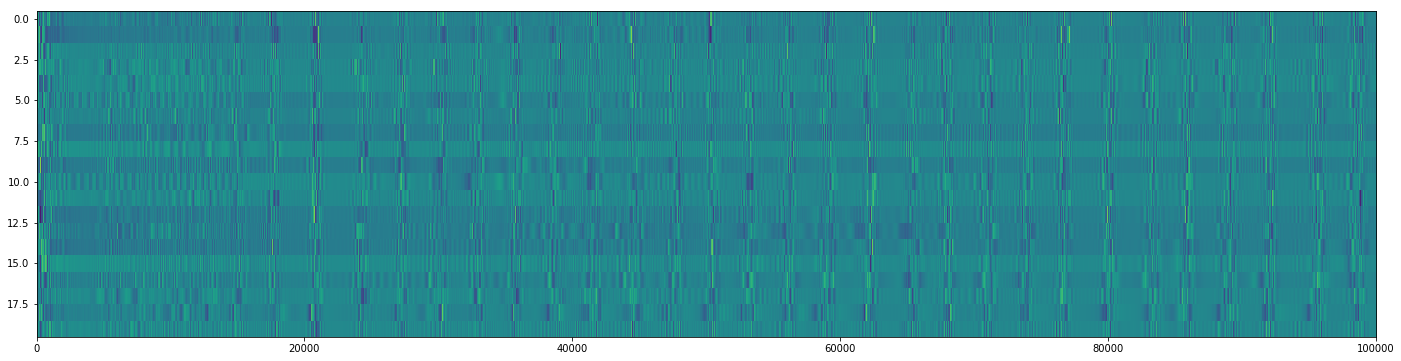

    Computing distribution stats... 

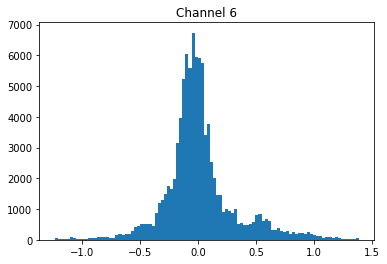

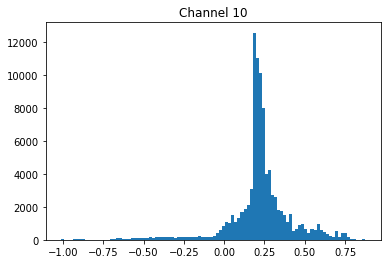

Done.
    Bimodal channels: (array([ 6, 10]),)
Simulation 22
    Solving... Done.


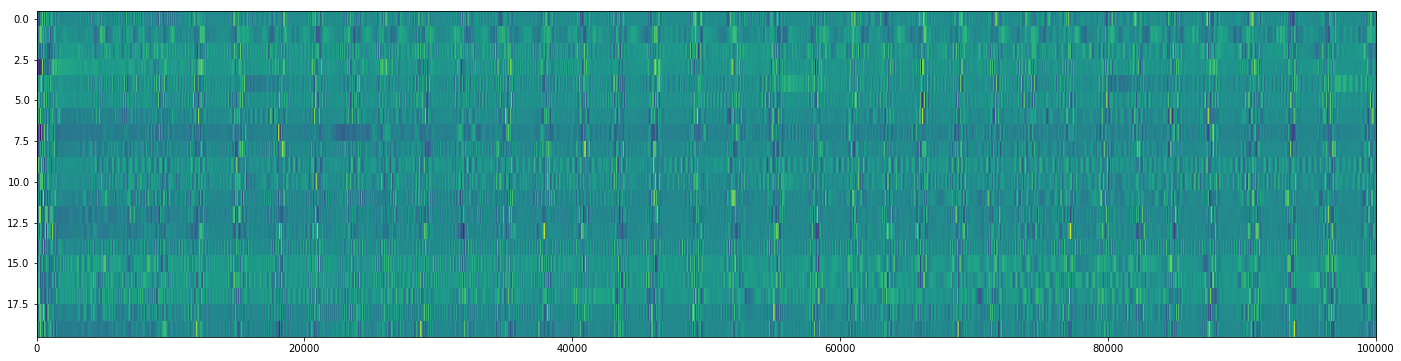

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)
Simulation 23
    Solving... Done.


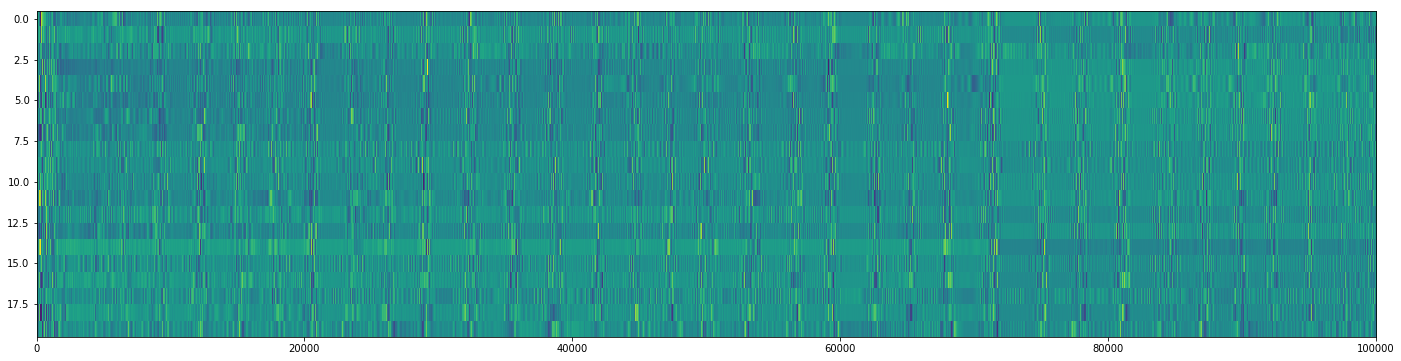

    Computing distribution stats... 

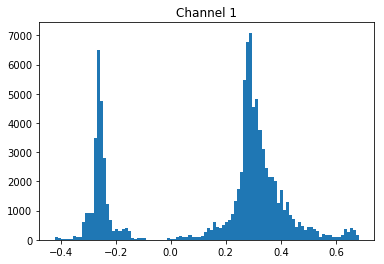

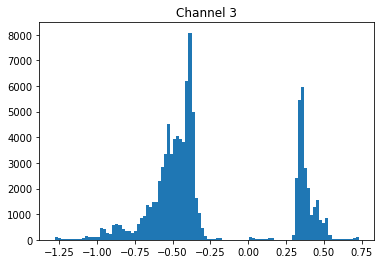

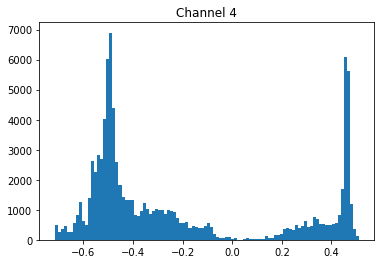

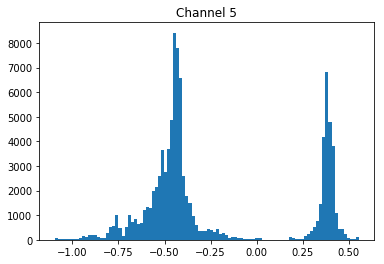

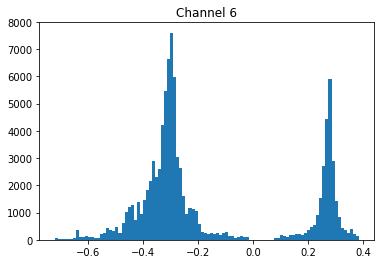

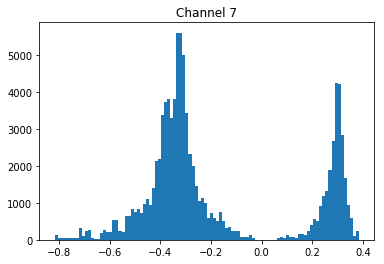

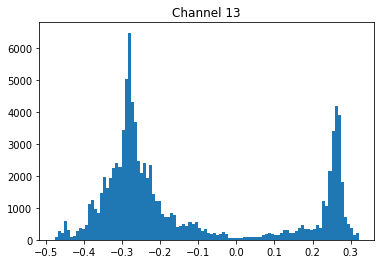

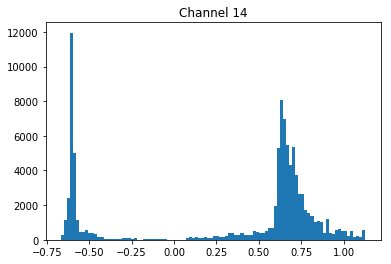

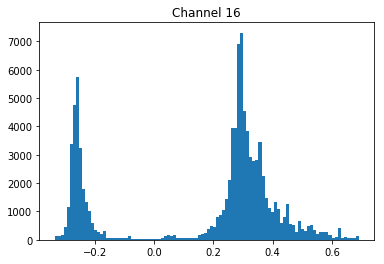

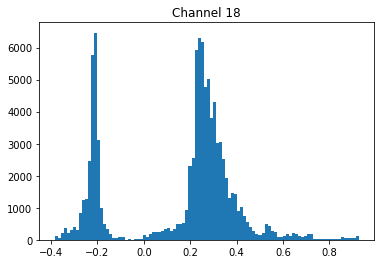

Done.
    Bimodal channels: (array([ 1,  3,  4,  5,  6,  7, 13, 14, 16, 18]),)
Simulation 24
    Solving... Done.


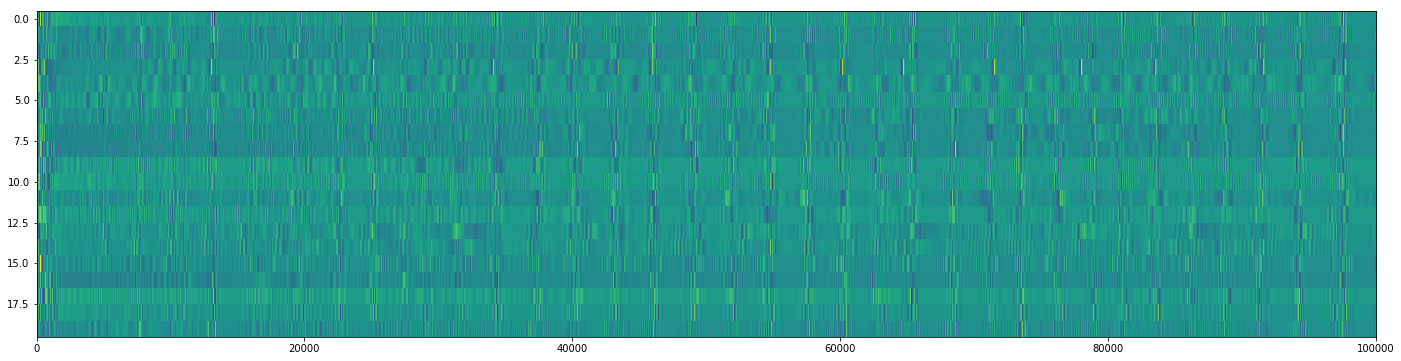

    Computing distribution stats... Done.
    Bimodal channels: (array([], dtype=int64),)


In [6]:
for i_sim in range( n_sim ):
    
    print( 'Simulation {0}'.format( i_sim ) )
    
    # Hopf oscillator characteristics
    l = np.random.randn( Nz ) + 2
    b = -0.1 + (np.random.randn( Nz ) + 0)*1.j
    
    def deriv( t, y ):
    
        z = y[:Nz]
        W = np.reshape( y[Nz:], (Nz, Nz) )

        z_dot = np.zeros( z.shape[0], dtype = np.complex )

        for i in range( z_dot.shape[0] ):
            z_dot[i] = z[i] * ( ( l[i] + 1.j ) + b[i] * z[i] * np.conj( z[i] ) )

            for k in range( z_dot.shape[0] ):
                z_dot[i] += W[i, k] * np.real( z[k] )

        W_dot = alpha * ( np.eye( Nz ) - np.outer( np.real( z ), np.real( z ) ) )

        y_dot = np.zeros( y.shape[0], dtype = np.complex )
        y_dot[:Nz] = z_dot
        y_dot[Nz:] = W_dot.flatten()

        return y_dot
    
    # TODO Randomize the z0 in an intelligent way
    z0 = np.zeros( (Nz,), dtype = np.complex )
    for i in range( z0.shape[0] ):
        z0[i] = 0.01 + 0.j

    W0 = np.random.randn( Nz, Nz )
    
    y0 = np.zeros( (Nz + Nz*Nz,), dtype = np.complex )
    y0[:Nz] = z0
    y0[Nz:] = W0.flatten()
    
    # Solve!
    print( '    Solving... ', end = '' )
    sol = scipy.integrate.solve_ivp( deriv, t_span, y0,
                                     t_eval = t_eval )
    print( 'Done.' )
    
    t_star = sol.t
#     y_star = sol.y
    z_star = sol.y[:Nz, :]
#     W_star = np.reshape( y_star[Nz:, :], (Nz, Nz, y_star.shape[1]) )
    
    plt.figure( figsize = (24, 6) )
    plt.imshow( np.real( z_star ), aspect = 'auto' )
    plt.show()
    
    print( '    Computing distribution stats... ', end = '' )
    
    aic_bi_minus_uni = np.zeros( (Nz,) )
    bi_d = np.zeros( (Nz,) )
    bi_d_prime = np.zeros( (Nz,) )

    for i_channel in range( Nz ):
        channel_data = np.real( z_star[i_channel, :] )
        channel_low_raw = scipy.signal.filtfilt( taps_low, 1., channel_data )
        channel_low = channel_low_raw[n_taps_low:-n_taps_low]

        uni_model = GaussianMixture( n_components = 1 )
        bi_model = GaussianMixture( n_components = 2 )

        uni_model.fit( channel_low.reshape( -1, 1 ) )
        bi_model.fit( channel_low.reshape( -1, 1 ) )

        aic_bi_minus_uni[i_channel] = bi_model.aic( channel_low.reshape( -1, 1 ) ) - uni_model.aic( channel_low.reshape( -1, 1 ) )
        bi_d[i_channel] = ( bi_model.means_[1][0] - bi_model.means_[0][0] )
        bi_d_prime[i_channel] = ( bi_model.means_[1][0] - bi_model.means_[0][0] ) / np.sqrt( 0.5 * ( (1. / bi_model.precisions_[1][0,0]) + (1. / bi_model.precisions_[0][0,0]) ) )

        if np.abs( bi_d_prime[i_channel] ) > 2.5 and np.abs( bi_d[i_channel] ) > 0.5:
            plt.hist( channel_low, bins = 100 )
            plt.title( 'Channel {0}'.format( i_channel ) )
            plt.show()
        
    print( 'Done.' )
    
    bimodal_channels = np.where( (np.abs( bi_d_prime ) > 2.5) & (np.abs( bi_d ) > 0.5) )
    print( '    Bimodal channels: {0}'.format( bimodal_channels ) )
    
    for i_channel in range( Nz ):
        params_l.append( l[i_channel] )
        params_b.append( b[i_channel] )
        result_d.append( bi_d[i_channel] )
        result_d_prime.append( bi_d_prime[i_channel] )
        traces_all.append( z_star[i_channel, :] )
    

In [7]:
print( 'All Clear!' )

All Clear!


In [8]:
traces_all_array = np.zeros( (len( traces_all ), traces_all[0].shape[0]), dtype = np.complex )
for i in range( len( traces_all ) ):
    traces_all_array[i, :] = traces_all[i]

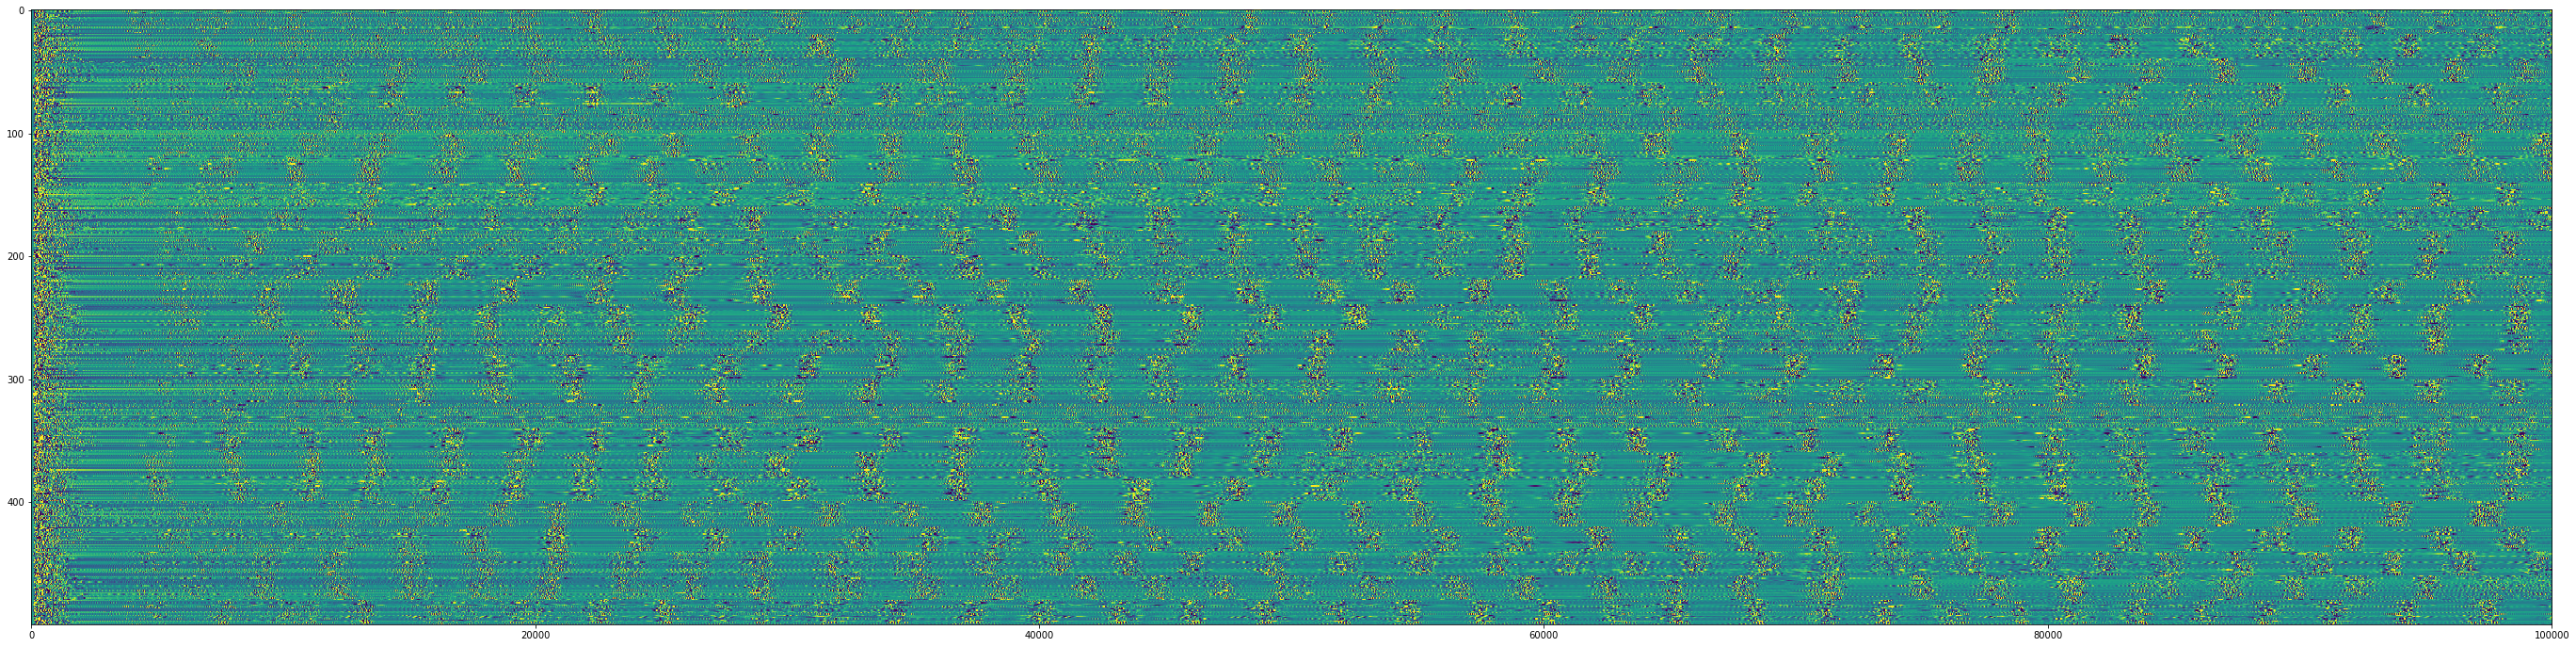

In [9]:
plt.figure( figsize = (48, 12) )
plt.imshow( np.real( traces_all_array ), aspect = 'auto',
            vmin = np.quantile( np.real( traces_all_array ), 0.01 ),
            vmax = np.quantile( np.real( traces_all_array ), 0.99 ),)
plt.show()

In [10]:
frac_above = np.sum( (np.abs( np.array( result_d_prime ) ) > 2.5) & (np.abs( np.array( result_d ) ) > 0.5) ) / len( result_d_prime )
print( 'Fraction above threshold: {0}'.format( frac_above ) )


Fraction above threshold: 0.074


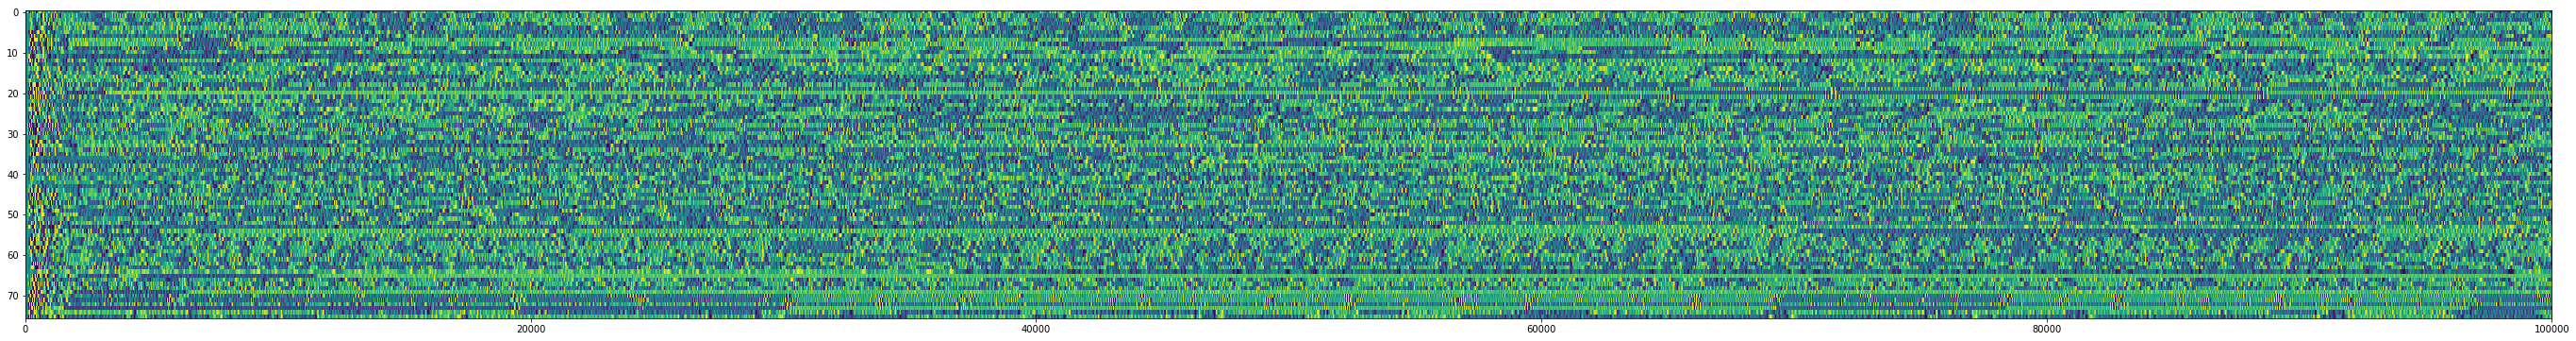

In [16]:
bistable_channels = np.where( (np.abs( np.array( result_d_prime ) ) > 2.5) & (np.abs( np.array( result_d ) ) > 0.5) )[0]

plt.figure( figsize = (48, 6) )
plt.imshow( np.real( traces_all_array[bistable_channels, :] ), aspect = 'auto',
            vmin = np.quantile( np.real( traces_all_array[bistable_channels, :] ), 0.01 ),
            vmax = np.quantile( np.real( traces_all_array[bistable_channels, :] ), 0.99 ),)
plt.show()

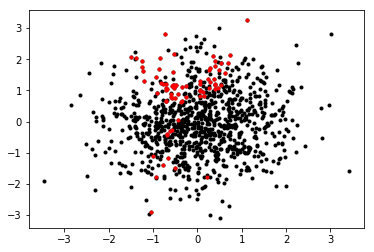

In [20]:
plt.plot( np.imag( np.array( params_b ) ), np.array( params_l ), 'k.' )
plt.plot( np.imag( np.array( params_b ) )[bistable_channels], np.array( params_l )[bistable_channels], 'r.' )


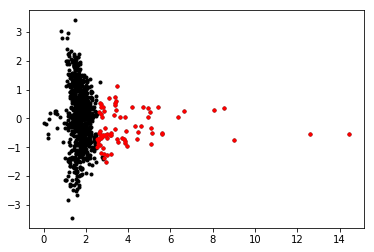

In [19]:
plt.plot( np.abs( np.array( result_d_prime ) ), np.imag( np.array( params_b ) ), 'k.' )
plt.plot( np.abs( np.array( result_d_prime ) )[bistable_channels], np.imag( np.array( params_b ) )[bistable_channels], 'r.' )


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


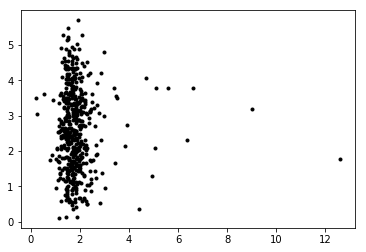

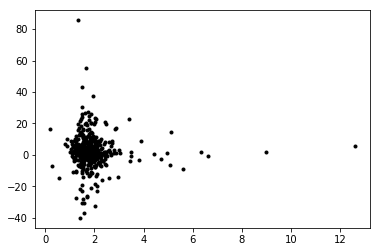

In [12]:
params_r = np.sqrt( - np.divide( np.array( params_l ), np.real( np.array( params_b ) ) ) )
params_omega = 1 + np.multiply( np.imag( np.array( params_b ) ), np.power( params_r, 2. ) )
plt.plot( np.abs( np.array( result_d_prime )[sort_idx] ), params_r, 'k.' )
plt.show()
plt.plot( np.abs( np.array( result_d_prime )[sort_idx] ), params_omega, 'k.' )